In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd
from sklearn.preprocessing import MinMaxScaler

## Preprocessing training Data

In [3]:
data_pres = xr.open_mfdataset('pres.s*.nc')
data_pres = data_pres.sel(lat = slice(13,12), lon=slice(78,79))
xr.Dataset(data_pres)

/home/sushant/anaconda3/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:    (lat: 1, lon: 1, time: 16072, nbnds: 2)
Coordinates:
  * lat        (lat) float32 12.38
  * lon        (lon) float32 78.75
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    pres       (time, lat, lon) float32 dask.array<chunksize=(11688, 1, 1), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(11688, 2), meta=np.ndarray>

In [4]:
data_u_wnd = xr.open_mfdataset('uwnd.10m*.nc')
data_u_wnd = data_u_wnd.sel(lat = slice(13,12), lon=slice(78,79))
data_u_wnd = data_u_wnd.squeeze()
data_u_wnd = data_u_wnd.drop_vars('level')
xr.Dataset(data_u_wnd)


/home/sushant/anaconda3/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:    (time: 16072, nbnds: 2)
Coordinates:
    lat        float32 12.38
    lon        float32 78.75
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    uwnd       (time) float32 dask.array<chunksize=(1460,), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(16072, 2), meta=np.ndarray>

In [5]:
data_u_tmp = xr.open_mfdataset('tmax.2m*.nc')
data_u_tmp = data_u_tmp.sel(lat = slice(13,12), lon=slice(78,79))
data_u_tmp = data_u_tmp.squeeze()
data_u_tmp = data_u_tmp.drop_vars('level')
xr.Dataset(data_u_tmp)

/home/sushant/anaconda3/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:    (time: 16072, nbnds: 2)
Coordinates:
    lat        float32 12.38
    lon        float32 78.75
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    tmax       (time) float32 dask.array<chunksize=(1460,), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(16072, 2), meta=np.ndarray>

In [6]:
data_u_prate = xr.open_mfdataset('prate.s*.nc')
data_u_prate = data_u_prate.sel(lat = slice(13,12), lon=slice(78,79))
xr.Dataset(data_u_prate)

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 1, time: 16072, nbnds: 2)
Coordinates:
  * lat        (lat) float32 12.38
  * lon        (lon) float32 78.75
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] dask.array<chunksize=(1460, 2), meta=np.ndarray>
    prate      (time, lat, lon) float32 dask.array<chunksize=(1460, 1, 1), meta=np.ndarray>

In [7]:
time=data_pres['time'].values
lat=data_pres['lat'].values
lon=data_pres['lon'].values

In [8]:
time_dim=len(time)
lat_dim=len(lat)
lon_dim=len(lon)
time_dim, lat_dim, lon_dim

(16072, 1, 1)

In [9]:
press = data_pres['pres'].values
uwnd = data_u_wnd['uwnd'].values
tmp= data_u_tmp['tmax'].values
ppt=data_u_prate['prate'].values

In [10]:
press.shape, uwnd.shape, tmp.shape, ppt.shape

((16072, 1, 1), (16072,), (16072,), (16072, 1, 1))

In [11]:
num_time_steps = 12
num_variables = 4

In [12]:
input_data_temp_reshaped1 = tmp.reshape((-1, lat_dim * lon_dim))
input_data_precip_reshaped1 = ppt.reshape((-1, lat_dim * lon_dim))
input_data_uwind_reshaped1 = uwnd.reshape((-1, lat_dim * lon_dim))
input_data_press_reshaped1 = press.reshape((-1, lat_dim * lon_dim))


In [13]:
input_data_precip_reshaped1.shape

(16072, 1)

In [14]:
scaler = MinMaxScaler()
input_data_temp_scaled = scaler.fit_transform(input_data_temp_reshaped1)
input_data_precip_scaled = scaler.fit_transform(input_data_precip_reshaped1)
input_data_uwind_scaled = scaler.fit_transform(input_data_uwind_reshaped1)
input_data_press_scaled = scaler.fit_transform(input_data_press_reshaped1)

input_data_temp_scaled = input_data_temp_scaled.reshape((-1, lat_dim, lon_dim))
input_data_precip_scaled = input_data_precip_scaled.reshape((-1, lat_dim, lon_dim))
input_data_uwind_scaled = input_data_uwind_scaled.reshape((-1, lat_dim, lon_dim))
input_data_press_scaled = input_data_press_scaled.reshape((-1, lat_dim, lon_dim))

In [15]:
input_data_press_scaled.shape

(16072, 1)

In [16]:
input_data_temp_reshaped = []
input_data_precip_reshaped = []
input_data_uwind_reshaped = []
input_data_press_reshaped = []

target_data = []

In [17]:
for i in range(num_time_steps, len(time)):
    input_data_temp_reshaped.append(input_data_temp_scaled[i - num_time_steps:i])
    input_data_precip_reshaped.append(input_data_precip_scaled[i - num_time_steps:i])
    input_data_press_reshaped.append(input_data_press_scaled[i - num_time_steps:i])
    input_data_uwind_reshaped.append(input_data_uwind_scaled[i - num_time_steps:i])
    target_data.append(input_data_precip_scaled[i])

In [18]:
input_data_temp_reshaped = np.array(input_data_temp_reshaped)
input_data_precip_reshaped = np.array(input_data_precip_reshaped)
input_data_press_reshaped = np.array(input_data_press_reshaped)
input_data_uwind_reshaped = np.array(input_data_uwind_reshaped)
target_data = np.array(target_data)

In [19]:
target_data.shape, input_data_precip_reshaped.shape

((16060, 1), (16060, 12, 1))

## Preprocessing Validation data

In [20]:
data_pres = xr.open_dataset('/Vol1/sushant/Script/data/pres.sfc.gauss.2021.nc')
data_pres = data_pres.sel(lat = slice(13,12), lon=slice(78,79))
xr.Dataset(data_pres)
data_u_wnd = xr.open_dataset('/Vol1/sushant/Script/data/uwnd.10m.gauss.2021.nc')
data_u_wnd = data_u_wnd.sel(lat = slice(13,12), lon=slice(78,79))
data_u_wnd = data_u_wnd.squeeze()
data_u_wnd = data_u_wnd.drop_vars('level')
xr.Dataset(data_u_wnd)
data_u_tmp = xr.open_dataset('/Vol1/sushant/Script/data/tmax.2m.gauss.2021.nc')
data_u_tmp = data_u_tmp.sel(lat = slice(13,12), lon=slice(78,79))
data_u_tmp = data_u_tmp.squeeze()
data_u_tmp = data_u_tmp.drop_vars('level')
xr.Dataset(data_u_tmp)
data_u_prate = xr.open_dataset('/Vol1/sushant/Script/data/prate-Copy1.sfc.gauss.2021.nc')
data_u_prate = data_u_prate.sel(lat = slice(13,12), lon=slice(78,79))
xr.Dataset(data_u_prate)

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 1, time: 1460, nbnds: 2)
Coordinates:
  * lat        (lat) float32 12.38
  * lon        (lon) float32 78.75
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    prate      (time, lat, lon) float32 ...

In [21]:
time_val=data_pres['time'].values
time_val.shape

(1460,)

In [22]:
press_val = data_pres['pres'].values
uwnd_val = data_u_wnd['uwnd'].values
tmp_val = data_u_tmp['tmax'].values
ppt_val = data_u_prate['prate'].values

In [23]:
press_val.shape, uwnd_val.shape, tmp_val.shape

((1460, 1, 1), (1460,), (1460,))

In [24]:
input_data_temp_reshaped1_val = tmp_val.reshape((-1, lat_dim * lon_dim))
input_data_precip_reshaped1_val = ppt_val.reshape((-1, lat_dim * lon_dim))
input_data_uwind_reshaped1_val = uwnd_val.reshape((-1, lat_dim * lon_dim))
input_data_press_reshaped1_val = press_val.reshape((-1, lat_dim * lon_dim))


In [25]:
input_data_precip_reshaped1_val.shape

(1460, 1)

In [26]:
scaler_val = MinMaxScaler()
input_data_temp_scaled_val = scaler_val.fit_transform(input_data_temp_reshaped1_val)
input_data_precip_scaled_val = scaler_val.fit_transform(input_data_precip_reshaped1_val)
input_data_uwind_scaled_val = scaler_val.fit_transform(input_data_uwind_reshaped1_val)
input_data_press_scaled_val = scaler_val.fit_transform(input_data_press_reshaped1_val)

input_data_temp_scaled_val = input_data_temp_scaled_val.reshape((-1, lat_dim, lon_dim))
input_data_precip_scaled_val = input_data_precip_scaled_val.reshape((-1, lat_dim, lon_dim))
input_data_uwind_scaled_val = input_data_uwind_scaled_val.reshape((-1, lat_dim, lon_dim))
input_data_press_scaled_val = input_data_press_scaled_val.reshape((-1, lat_dim, lon_dim))

In [27]:
input_data_temp_reshaped_val = []
input_data_precip_reshaped_val = []
input_data_uwind_reshaped_val = []
input_data_press_reshaped_val = []

target_data_val = []

In [28]:
for i in range(num_time_steps, len(time_val)):
    input_data_temp_reshaped_val.append(input_data_temp_scaled_val[i - num_time_steps:i])
    input_data_precip_reshaped_val.append(input_data_precip_scaled_val[i - num_time_steps:i])
    input_data_press_reshaped_val.append(input_data_press_scaled_val[i - num_time_steps:i])
    input_data_uwind_reshaped_val.append(input_data_uwind_scaled_val[i - num_time_steps:i])
    target_data_val.append(input_data_precip_scaled_val[i])

In [29]:
input_data_temp_reshaped_val = np.array(input_data_temp_reshaped_val)
input_data_precip_reshaped_val = np.array(input_data_precip_reshaped_val)
input_data_press_reshaped_val = np.array(input_data_press_reshaped_val)
input_data_uwind_reshaped_val = np.array(input_data_uwind_reshaped_val)
target_data_val = np.array(target_data_val)

In [30]:
input_data_uwind_reshaped_val.shape, target_data_val.shape

((1448, 12, 1), (1448, 1))

In [31]:
input_data_press_reshaped.max(),input_data_press_reshaped.min()

(1.0, 0.0)

# LSTM Model

In [260]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [239]:
input_shape_temp = (num_time_steps, lat_dim * lon_dim)  
input_shape_precip = (num_time_steps, lat_dim * lon_dim)  
input_shape_uwind = (num_time_steps, lat_dim * lon_dim)  
input_shape_press = (num_time_steps, lat_dim * lon_dim)

input_temp = Input(shape=input_shape_temp)
input_precip = Input(shape=input_shape_precip)
input_uwind = Input(shape=input_shape_uwind)
input_press = Input(shape=input_shape_press)

lstm_temp = LSTM(64)(input_temp)
lstm_precip = LSTM(64)(input_precip)
lstm_uwind = LSTM(64)(input_uwind)
lstm_press = LSTM(64)(input_press)

concatenated = concatenate([lstm_temp, lstm_precip, lstm_uwind, lstm_press])
dense = Dense(64, activation='relu')(concatenated)
output = Dense(lat_dim * lon_dim)(dense)
model = Model(inputs=[input_temp, input_precip, input_uwind, input_press], outputs=output)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_41 (InputLayer)          [(None, 12, 1)]      0           []                               
                                                                                                  
 input_42 (InputLayer)          [(None, 12, 1)]      0           []                               
                                                                                                  
 input_43 (InputLayer)          [(None, 12, 1)]      0           []                               
                                                                                                  
 input_44 (InputLayer)          [(None, 12, 1)]      0           []                               
                                                                                           

In [240]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [241]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min')
model.compile(loss='mse', optimizer='adam')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.2, min_lr=0.00001)

In [242]:
history=model.fit([input_data_temp_reshaped, input_data_precip_reshaped, 
           input_data_uwind_reshaped, input_data_press_reshaped], 
           target_data, epochs=50, batch_size=32,
           validation_data=([input_data_temp_reshaped_val,input_data_precip_reshaped_val,
                            input_data_uwind_reshaped_val,input_data_press_reshaped_val], target_data_val),
           shuffle=False, callbacks=[reduce_lr, early_stopping])

Epoch 1/50
502/502 [==============================] - 9s 9ms/step - loss: 0.0032 - val_loss: 0.0029 - lr: 0.0010
Epoch 2/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0025 - val_loss: 0.0027 - lr: 0.0010
Epoch 3/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0023 - val_loss: 0.0027 - lr: 0.0010
Epoch 4/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0023 - val_loss: 0.0027 - lr: 0.0010
Epoch 5/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0023 - val_loss: 0.0028 - lr: 0.0010
Epoch 6/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0023 - val_loss: 0.0028 - lr: 0.0010
Epoch 7/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0023 - val_loss: 0.0030 - lr: 0.0010
Epoch 8/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0023 - val_loss: 0.0029 - lr: 0.0010
Epoch 9/50
502/502 [==============================] - 3s 6ms/step - loss: 0.0022 - val_loss: 0.0

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline

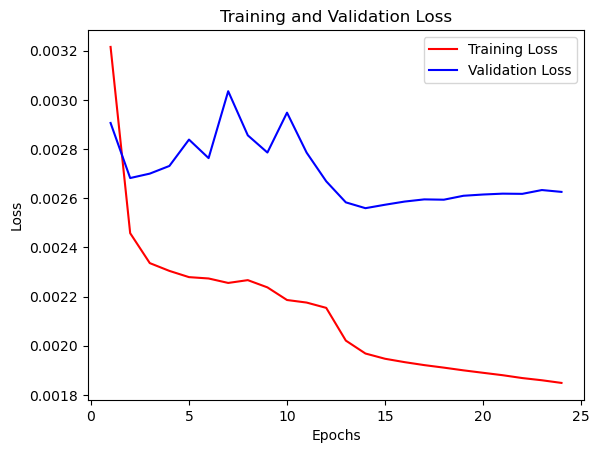

In [244]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [245]:
data_pres = xr.open_dataset('/Vol1/sushant/Script/data/pres.sfc.gauss.2022.nc')
data_pres = data_pres.sel(lat = slice(13,12), lon=slice(78,79))
xr.Dataset(data_pres)
data_u_wnd = xr.open_dataset('/Vol1/sushant/Script/data/uwnd.10m.gauss.2022.nc')
data_u_wnd = data_u_wnd.sel(lat = slice(13,12), lon=slice(78,79))
data_u_wnd = data_u_wnd.squeeze()
data_u_wnd = data_u_wnd.drop_vars('level')
xr.Dataset(data_u_wnd)
data_u_tmp = xr.open_dataset('/Vol1/sushant/Script/data/tmax.2m.gauss.2022.nc')
data_u_tmp = data_u_tmp.sel(lat = slice(13,12), lon=slice(78,79))
data_u_tmp = data_u_tmp.squeeze()
data_u_tmp = data_u_tmp.drop_vars('level')
xr.Dataset(data_u_tmp)
data_u_prate = xr.open_dataset('/Vol1/sushant/Script/data/prate-Copy1.sfc.gauss.2022.nc')
data_u_prate = data_u_prate.sel(lat = slice(13,12), lon=slice(78,79))
xr.Dataset(data_u_prate)

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 1, time: 1460, nbnds: 2)
Coordinates:
  * lat        (lat) float32 12.38
  * lon        (lon) float32 78.75
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T18:00:00
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    prate      (time, lat, lon) float32 ...

In [246]:
press_test = data_pres['pres'].values
uwnd_test = data_u_wnd['uwnd'].values
tmp_test = data_u_tmp['tmax'].values
ppt_test = data_u_prate['prate'].values
ppt_test.min()

0.0

In [247]:
input_data_temp_reshaped1_test = tmp_test.reshape((-1, lat_dim * lon_dim))
input_data_precip_reshaped1_test = ppt_test.reshape((-1, lat_dim * lon_dim))
input_data_uwind_reshaped1_test = uwnd_test.reshape((-1, lat_dim * lon_dim))
input_data_press_reshaped1_test = press_test.reshape((-1, lat_dim * lon_dim))


In [248]:
scaler_test = MinMaxScaler()
input_data_temp_scaled_test = scaler_test.fit_transform(input_data_temp_reshaped1_test)
input_data_uwind_scaled_test = scaler_test.fit_transform(input_data_uwind_reshaped1_test)
input_data_press_scaled_test = scaler_test.fit_transform(input_data_press_reshaped1_test)
input_data_precip_scaled_test = scaler_test.fit_transform(input_data_precip_reshaped1_test)

In [249]:
input_data_temp_reshaped_test = []
input_data_precip_reshaped_test = []
input_data_uwind_reshaped_test = []
input_data_press_reshaped_test = []

target_data_test = []

In [250]:
for i in range(num_time_steps, len(time_val)):
    input_data_temp_reshaped_test.append(input_data_temp_scaled_test[i - num_time_steps:i])
    input_data_precip_reshaped_test.append(input_data_precip_scaled_test[i - num_time_steps:i])
    input_data_press_reshaped_test.append(input_data_press_scaled_test[i - num_time_steps:i])
    input_data_uwind_reshaped_test.append(input_data_uwind_scaled_test[i - num_time_steps:i])
    target_data_test.append(input_data_precip_scaled_test[i])

In [251]:
input_data_temp_reshaped_test = np.array(input_data_temp_reshaped_test)
input_data_precip_reshaped_test = np.array(input_data_precip_reshaped_test)
input_data_press_reshaped_test = np.array(input_data_press_reshaped_test)
input_data_uwind_reshaped_test = np.array(input_data_uwind_reshaped_test)
target_data_test = np.array(target_data_test)

In [252]:
input_data_uwind_reshaped_test.shape, target_data_test.shape

((1448, 12, 1), (1448, 1))

In [253]:
predictions=model.predict([input_data_temp_reshaped_test, input_data_precip_reshaped_test, 
           input_data_uwind_reshaped_test, input_data_press_reshaped_test])

46/46 [==============================] - 1s 3ms/step


In [254]:
predictions.shape

(1448, 1)

In [255]:
predictions

array([[-0.00486333],
       [-0.00470594],
       [-0.00383618],
       ...,
       [-0.0035374 ],
       [-0.00138217],
       [-0.0032233 ]], dtype=float32)

In [256]:
rev_trans=scaler_test.inverse_transform(predictions)

In [257]:
y_pred=rev_trans
y_pred.shape

(1448, 1)

In [258]:
y_test=scaler_test.inverse_transform(target_data_test)
y_test.shape

(1448, 1)

In [259]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))*86400/4

print("R2 Score:", r2)
print("RMSE:", mse)


R2 Score: 0.44915112570374294
RMSE: 3.117886302061379
